Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\91832\.ipython\Lib\site-packages\shap\plots\_beeswarm.py:1145: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\91832\.ipython\Lib\site-packages\shap\plots\_beeswarm.py:753: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


<Figure size 1000x600 with 0 Axes>

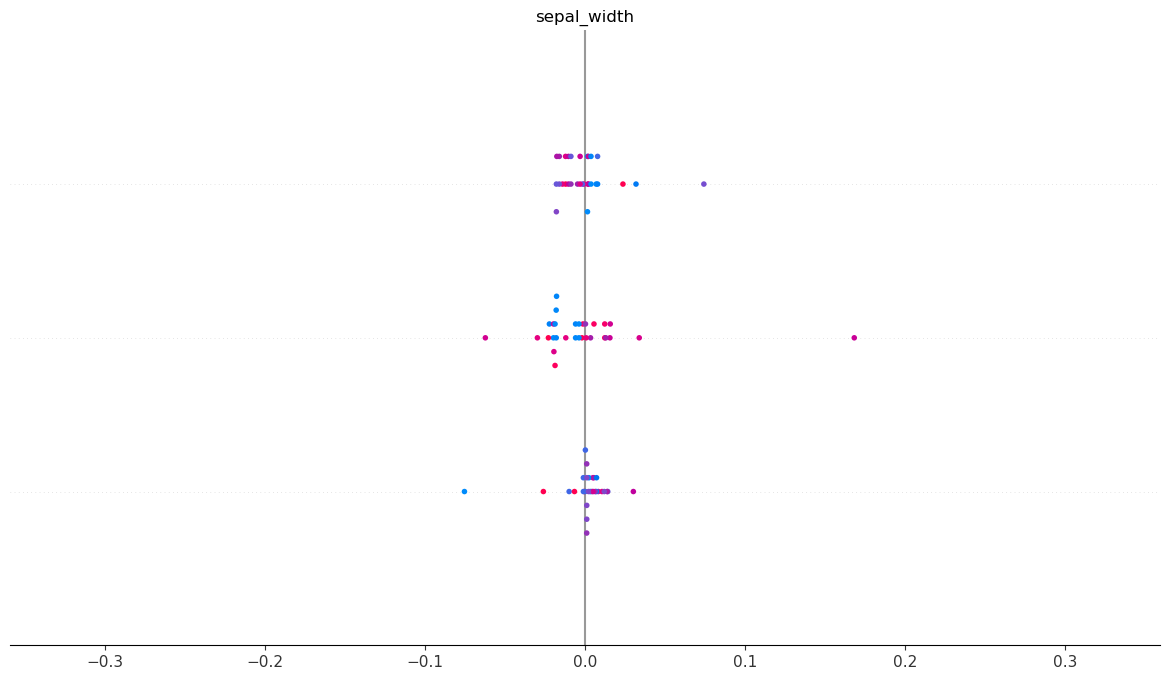

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import shap

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    label_encoder = LabelEncoder()
    df['species'] = label_encoder.fit_transform(df['species'])
    X = df.drop(columns=['species'])
    y = df['species']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, label_encoder

def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, label_encoder):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    return accuracy, report

def plot_feature_importance(model, X_test, feature_names):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="dot")
    plt.show()

if __name__ == "__main__":
    file_path = "IRIS.csv"  # Update path as needed
    df = load_data(file_path)
    X, y, label_encoder = preprocess_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_model(X_train, y_train)
    accuracy, report = evaluate_model(model, X_test, y_test, label_encoder)
    print(f"Accuracy: {accuracy}\n")
    print("Classification Report:\n", report)
    plot_feature_importance(model, X_test, df.drop(columns=['species']).columns)